
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 500.  Construct portfolios from the 500 stocks in the S&P 500 large cap index and examine the results of different weighting schemes.


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [9]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [10]:
investment_universe = ['sp500-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [11]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,-53.14,-12.38,-26.51,-5.89,-10.92,38.62,26.63,23.33,-26.51,-618.48
1,AOS,A. O. Smith,US Stocks:Industrials,402.46,178.88,-6.33,19.49,2.51,59.74,20.66,32.34,-6.33,-204.71
2,ABT,Abbott,US Stocks:Healthcare,12.37,72.13,-12.50,9.95,14.31,16.25,8.76,21.13,-12.50,-264.12
3,ABBV,AbbVie,US Stocks:Healthcare,-73.41,5.83,8.73,25.36,9.55,18.88,13.58,25.93,8.73,0.34
4,ACN,Accenture,US Stocks:Technology,146.83,29.08,-18.32,12.38,14.23,26.89,11.99,29.03,-18.32,-531.83
5,ATVI,Activision Blizzard,US Stocks:Communication Services,-22.31,14.98,-4.50,8.94,1.12,17.86,12.26,27.15,-4.50,-122.17
6,ADM,ADM,US Stocks:Consumer Staples,-44.29,-44.65,9.33,25.08,17.39,20.05,13.56,25.26,9.33,0.37
7,ADBE,Adobe Inc.,US Stocks:Technology,253.91,151.50,-28.84,1.13,13.73,29.45,13.33,35.43,-28.84,-1021.80
8,ADP,ADP,US Stocks:Technology,-50.18,-17.34,10.44,10.85,15.71,28.46,19.96,25.36,10.44,0.41
9,AAP,Advance Auto Parts,US Stocks:Consumer Discretionary,2.23,-54.16,-33.39,7.04,6.65,23.92,11.64,37.55,-33.39,-1253.79


In [12]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
126,CEG,Constellation Energy,US Stocks:Utilities,-2.98,-35.80,58.38,58.38,58.38,31.04,19.40,36.21,58.38,1.61
413,SRE,Sempra Energy,US Stocks:Utilities,6.86,18.45,16.16,2.70,11.41,22.27,14.93,24.57,16.16,0.66
198,FSLR,First Solar,US Stocks:Technology,412.39,57.77,120.23,47.26,20.01,63.07,34.83,54.99,120.23,2.19
172,ENPH,Enphase,US Stocks:Technology,-76.63,-64.84,59.79,82.13,152.55,53.71,40.87,74.72,59.79,0.80
474,VICI,Vici Properties,US Stocks:Real Estate,152.17,41.65,25.97,14.29,16.43,21.85,12.81,28.65,25.97,0.91
261,IRM,Iron Mountain,US Stocks:Real Estate,185.61,69.99,24.89,27.76,17.51,23.92,9.42,29.51,24.89,0.84
427,STLD,Steel Dynamics,US Stocks:Materials,2198.84,276.07,120.39,66.37,26.02,44.21,10.36,42.89,120.39,2.81
346,NUE,Nucor,US Stocks:Materials,2009.24,259.99,60.35,57.27,24.78,44.18,11.31,50.36,60.35,1.20
389,PWR,Quanta Services,US Stocks:Industrials,214.46,54.58,47.16,57.46,32.24,26.09,10.77,32.61,47.16,1.45
493,GWW,W. W. Grainger,US Stocks:Industrials,985.16,81.46,36.63,31.94,22.52,50.40,15.67,30.66,36.63,1.19


### Sample Portfolios
Format 'Investment option': weight

In [13]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [14]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [15]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [16]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [17]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [18]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,CEG,SRE,FSLR,ENPH,VICI,IRM,STLD,NUE,PWR,GWW,...,AJG,XOM,MPC,LW,HSY,GPC,ULTA,TMUS,OMC,Ranked Portfolio
Annual Returns,58.38,16.16,120.23,59.79,25.97,24.89,120.39,60.35,47.16,36.63,...,24.63,44.33,54.49,55.11,21.17,27.52,40.11,32.50,23.54,50.15
Std Dev,36.21,24.57,54.99,74.72,28.65,29.51,42.89,50.36,32.61,30.66,...,24.92,38.68,51.13,33.54,16.27,27.09,39.56,24.98,31.93,29.36
Sharpe Ratio,1.61,0.66,2.19,0.80,0.91,0.84,2.81,1.20,1.45,1.19,...,0.99,1.15,1.07,1.64,1.30,1.02,1.01,1.30,0.74,1.71
Weight,0.06,0.02,0.06,0.03,0.04,0.04,0.07,0.04,0.05,0.04,...,0.05,0.03,0.03,0.06,0.02,0.04,0.06,0.07,0.05,1.00
Worst Typical Down Year,-14.04,-32.98,10.25,-89.65,-31.33,-34.13,34.61,-40.37,-18.06,-24.69,...,-25.21,-33.03,-47.77,-11.97,-11.37,-26.66,-39.01,-17.46,-40.32,-8.58
Black Swan,-50.25,-57.55,-44.74,-164.37,-59.98,-63.64,-8.28,-90.73,-50.67,-55.35,...,-50.13,-71.71,-98.90,-45.51,-27.64,-53.75,-78.57,-42.44,-72.25,-37.94


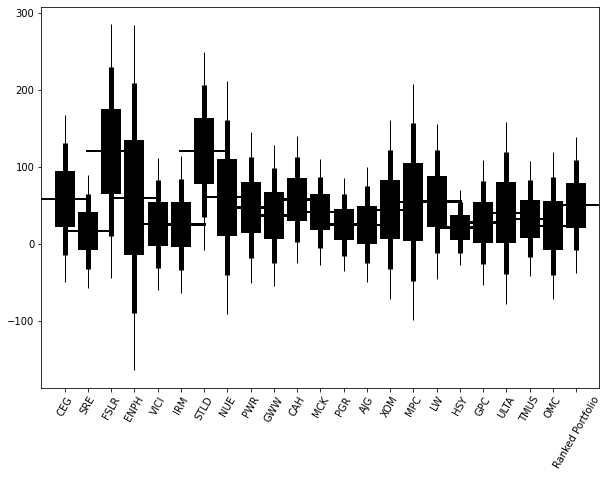

In [19]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

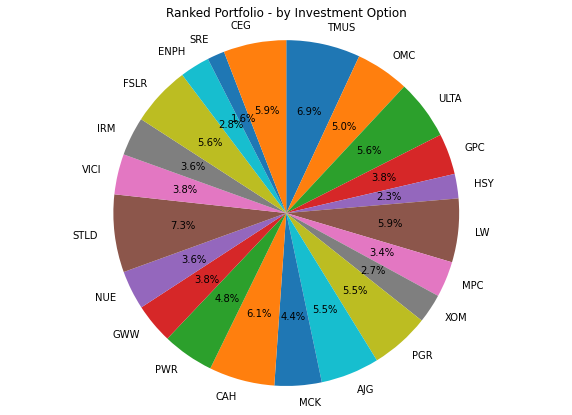

TMUS   0.07
OMC    0.05
ULTA   0.06
GPC    0.04
HSY    0.02
LW     0.06
MPC    0.03
XOM    0.03
PGR    0.06
AJG    0.05
MCK    0.04
CAH    0.06
PWR    0.05
GWW    0.04
NUE    0.04
STLD   0.07
VICI   0.04
IRM    0.04
FSLR   0.06
ENPH   0.03
SRE    0.02
CEG    0.06



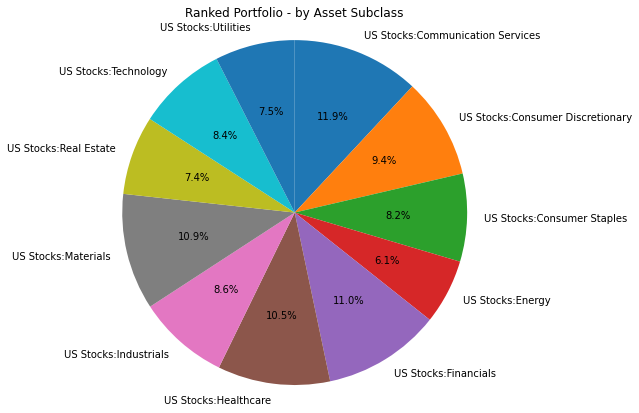

US Stocks:Communication Services   0.12
US Stocks:Consumer Discretionary   0.09
US Stocks:Consumer Staples         0.08
US Stocks:Energy                   0.06
US Stocks:Financials               0.11
US Stocks:Healthcare               0.11
US Stocks:Industrials              0.09
US Stocks:Materials                0.11
US Stocks:Real Estate              0.07
US Stocks:Technology               0.08
US Stocks:Utilities                0.07



In [20]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [21]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    CEG                            0.0586
    SRE                            0.0162
    FSLR                           0.0560
    ENPH                           0.0278
    VICI                           0.0378
    IRM                            0.0362
    STLD                           0.0727
    NUE                            0.0364
    PWR                            0.0483
    GWW                            0.0375
    CAH                            0.0614
    MCK                            0.0440
    PGR                            0.0554
    AJG                            0.0548
    XOM                            0.0273
    MPC                            0.0335
    LW                             0.0595
    HSY                            0.0229
    GPC                            0.0383
    ULTA                           0.0558
    TMUS                           0.0693
    OMC                            0.0502


### Optimize Portfolio

In [22]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [23]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer......

Ranked Portfolio Metrics:           
    max_sharpe_ratio            2.05
    annual_return              59.92
    std_dev                    29.28
    worst typical down year     1.36
    black_swan                -27.92


Ranked Portfolio Weights:
    CEG                            0.0500
    SRE                            0.1100
    FSLR                           0.1100
    ENPH                           0.0000
    VICI                           0.0000
    IRM                            0.0000
    STLD                           0.1000
    NUE                            0.0000
    PWR                            0.0900
    GWW                            0.0000
    CAH                            0.1100
    MCK                            0.1200
    PGR                            0.0000
    AJG                            0.0000
    XOM                            0.0400
    MPC                            0.1300
    LW                             0.0500
    HSY    

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).